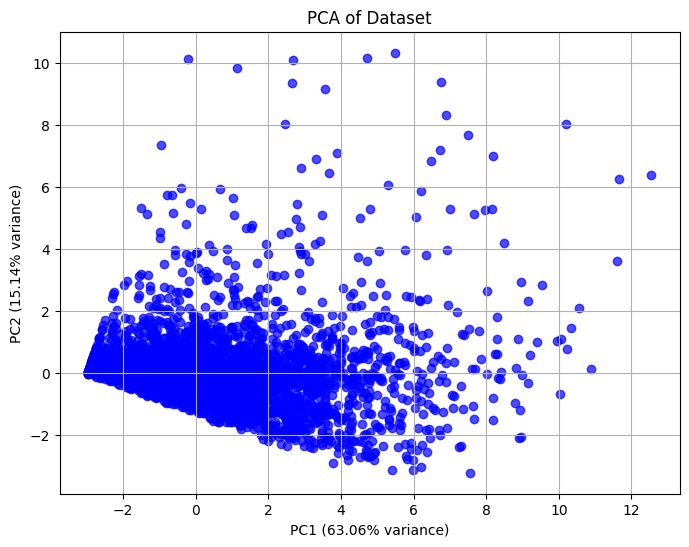

Explained variance ratio: [0.63060643 0.15136463]


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example assuming the dataset is in a CSV file named 'dataset.csv'
# and has columns: Customer ID, I, Iu, Imax, Entropy, BasketNum, SumExp, AvgExp.
data = pd.read_csv('/content/new_df.csv')

# Drop non-numerical or ID-like columns
X = data.drop(columns=['Customer ID'])

# Check for missing values and handle if necessary
# For example, dropping rows with missing values:
X = X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Extract the principal components
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# Plot the two principal components
plt.figure(figsize=(8,6))
plt.scatter(pc1, pc2, c='blue', alpha=0.7)
plt.xlabel('PC1 (%.2f%% variance)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 (%.2f%% variance)' % (pca.explained_variance_ratio_[1]*100))
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

# Optional: print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


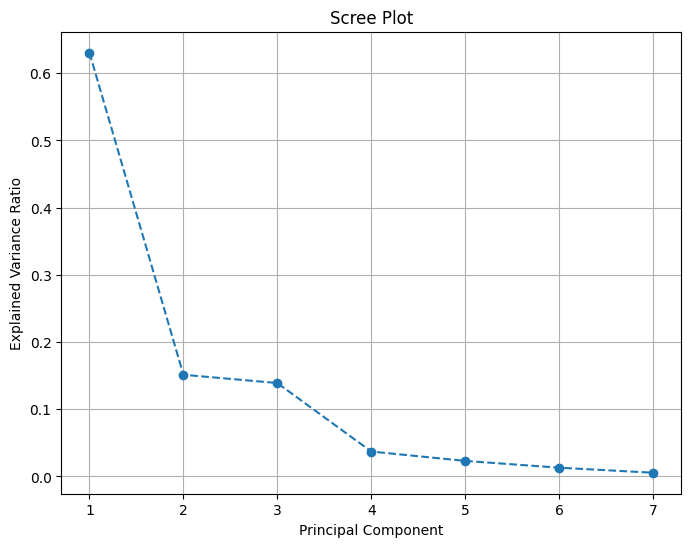

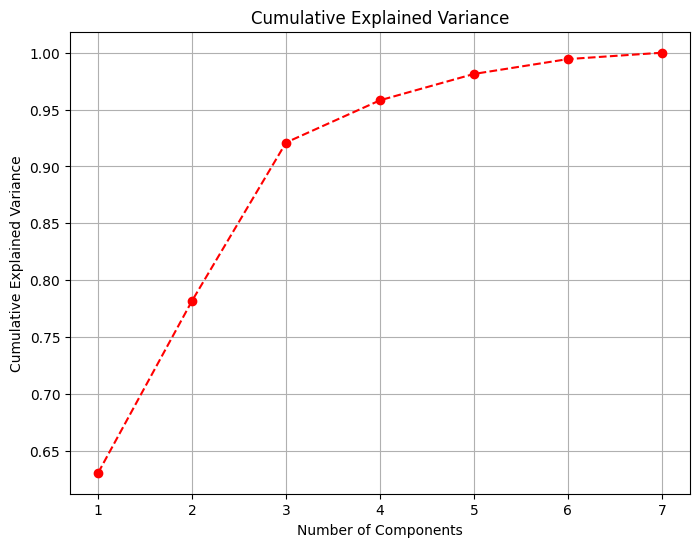

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Example: Assuming 'X' is your cleaned and numeric dataset (excluding Customer ID)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with enough components (e.g., equal to the number of features)
pca = PCA(n_components=X.shape[1])
pca.fit(X_scaled)

# Explained variance ratio per component
explained_var = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_var = explained_var.cumsum()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--', color='red')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

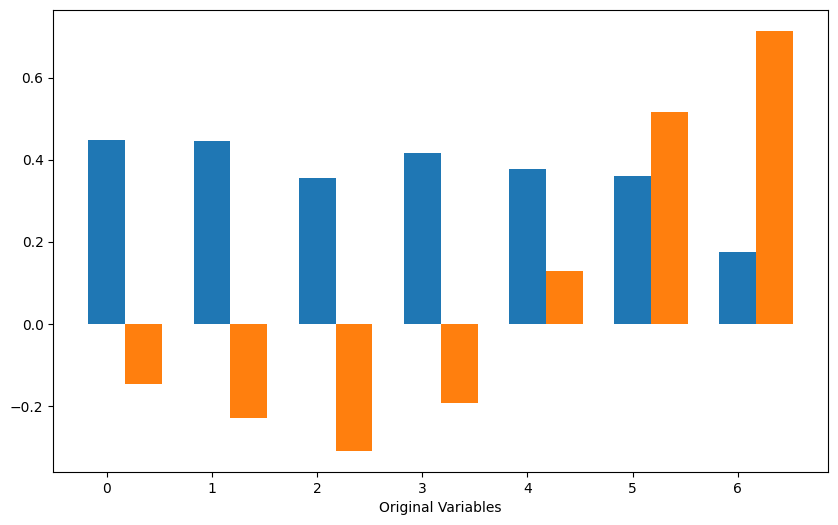

In [5]:
import numpy as np

# Get feature names if available
features = X.columns

# Loadings: the coefficients linking original variables to the principal components
loadings = pca.components_[:2]  # Taking only first 2 PCs
num_features = loadings.shape[1]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(num_features)

# Plot PC1 loadings
plt.bar(index, loadings[0, :], bar_width, label='PC1')

# Plot PC2 loadings, offset for clarity
plt.bar(index + bar_width, loadings[1, :], bar_width, label='PC2')

# Add labels and title
plt.xlabel('Original Variables')
plt


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Load, preprocess data, and generate frequent itemsets as before,
# then plot your desired graphs without closed or maximal itemsets.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, fpclose, fpmax

#-----------------------------------------------------
# Step 1: Load and Preprocess the Data
#-----------------------------------------------------
# Replace 'your_data.csv' with the path to your transactional dataset.
# The dataset should contain transactions identified by 'Invoice' and product 'Description'.
df = pd.read_csv('/content/clean_df.csv')

# Ensure there are no missing values in Invoice or Description
df = df.dropna(subset=['Invoice', 'Description'])

# Remove returned items if represented by negative Quantity
if 'Quantity' in df.columns:
    df = df[df['Quantity'] > 0]

# Convert Invoice to string if it's numeric
df['Invoice'] = df['Invoice'].astype(str)

# Strip leading/trailing spaces from Description
df['Description'] = df['Description'].str.strip()

#-----------------------------------------------------
# Step 2: Create a List of Transactions
#-----------------------------------------------------
# Group items by Invoice
basket = df.groupby('Invoice')['Description'].apply(list).reset_index(drop=True)
transactions = basket.tolist()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
#-----------------------------------------------------
# Step 3: One-Hot Encode the Transactions
#-----------------------------------------------------
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#-----------------------------------------------------
# Step 4: Generate Frequent Itemsets
#-----------------------------------------------------
# Adjust min_support based on dataset size and desired granularity
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#-----------------------------------------------------
# Step 5: Plot Histograms for All, Closed, Maximal Itemsets
#-----------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# All frequent itemsets histogram
axes[0].hist(frequent_itemsets['support'], bins=20, edgecolor='black')
axes[0].set_title('All Itemsets')
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Number of Itemsets')
axes[0].grid(True)

plt.tight_layout()
plt.show()


In [ ]:


#-----------------------------------------------------
# Step 6: Plot Top Frequent Itemsets by Support
#-----------------------------------------------------
# Sort frequent itemsets by support
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Convert itemsets to a readable string
top_itemsets['itemset_str'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemset_str'], top_itemsets['support'], color='skyblue')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.gca().invert_yaxis()  # highest support at the top
plt.grid(axis='x')
plt.show()
